In [6]:
from DataHandling import ReadBinary, GetSBCEvent
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import numpy as np

from scipy import optimize, signal

from LAr10Ana import LAr10AcousticT0 as a0

import importlib

In [42]:
importlib.reload(a0)

<module 'LAr10Ana.LAr10AcousticT0' from '/exp/e961/app/users/gputnam/ana/SBC-Analysis/LAr10Ana/LAr10AcousticT0.py'>

In [8]:
mpl.rc("font", size=14)

In [29]:
rundir = "/exp/e961/data/SBC-17-data/20171007_6"
PIEZO = 1
event = 20

# set this to false for teststand data
SUBTRACT_LED = True

In [17]:
ev = GetSBCEvent.GetEvent(rundir, event, "event", "fastDAQ")

In [25]:
fastdaq_time = ev["fastDAQ"]["time"]
dt = ev["fastDAQ"]["caldata"]["dt"][0]
raw_piezo = ev["fastDAQ"]["Piezo%i" % PIEZO]

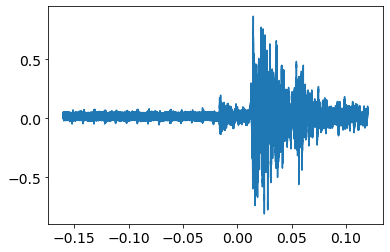

In [26]:
plt.plot(fastdaq_time, raw_piezo)

In [27]:
f, t, Sxx = a0.spectrogram(raw_piezo, fastdaq_time)

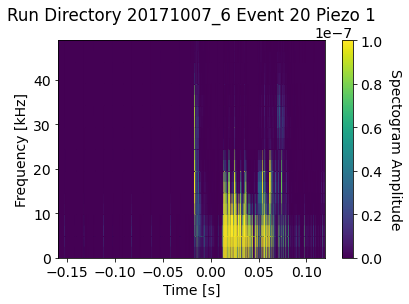

In [28]:
from scipy.fft import fftshift

plt.pcolormesh(t + fastdaq_time.min(), fftshift(f)[fftshift(f) < 5e4]/1e3, 
               fftshift(Sxx, axes=0)[fftshift(f) < 5e4, :], shading='gouraud', vmin=0, vmax=1e-7)
plt.xlabel("Time [s]")
plt.ylabel("Frequency [kHz]")
cbar = plt.colorbar()
cbar.set_label('Spectogram Amplitude', rotation=270, labelpad=20)

plt.title("Run Directory %s Event %i Piezo %i" % (rundir.split("/")[-1], event, PIEZO), pad=20)

plt.savefig("figures/spectogram_R%s_E%i_P%i.png" % (rundir.split("/")[-1], event, PIEZO))

In [ ]:
if SUBTRACT_LED:
    led_on = ev["fastDAQ"]["CAMgate"] < -0.5
    led_switch = np.diff(np.int8(led_on))
    led_switch_on = led_switch == 1
    led_switch_off = led_switch == -1
    led_switch_on_time = fastdaq_time[:-1][led_switch_on]
    led_switch_off_time = fastdaq_time[:-1][led_switch_off]
    
    led_amp, subt_piezo = a0.subtract_led(raw_piezo, fastdaq_time, led_switch_on_time, led_switch_off_time)

    piezo_waveform = subt_piezo
else:
    piezo_waveform = subt_piezo